# 과제 6
CART에서 criterion을 gini와 entropy를 각각 적용하고 max_depth를 변경하여 결과를 비교하고 해석하라(교재에 있는 데이터를 이용해도 됨)

In [117]:
# 데이터 불러오기
import seaborn as sns
iris = sns.load_dataset('iris') 

X = iris.drop('species', axis=1) 
y = iris['species']

from sklearn.preprocessing import LabelEncoder    
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values) 

# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)

In [118]:
X_test.shape

(45, 4)

# Max depth graph

[]

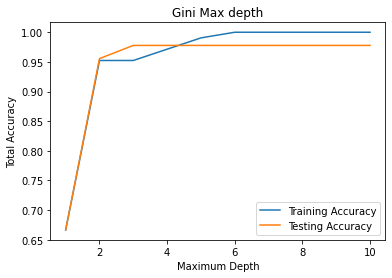

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 

max_depth_list = [1,2,3,4, 5, 6, 7, 8, 9, 10]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in max_depth_list:
    dtc = DecisionTreeClassifier(max_depth=x, criterion='gini', random_state=1) 
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(max_depth_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Gini Max depth')
plt.plot() # Show graph

[]

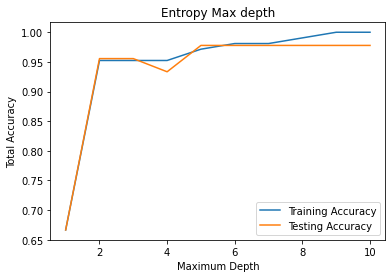

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 

max_depth_list = [1,2,3,4, 5, 6, 7, 8, 9, 10]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in max_depth_list:
    dtc = DecisionTreeClassifier(max_depth=x, criterion='entropy', random_state=1) 
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(accuracy_score(y_train, train_z))
    test_errors.append(accuracy_score(y_test, test_z))

x = np.arange(len(max_depth_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Entropy Max depth')
plt.plot() # Show graph

# < Criterian >

# 1. Gini

In [ ]:
# Classification Tree
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  
y_test_pred = dtc.predict(X_test)    

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

# Confusion matrix
print(metrics.confusion_matrix(y_test, y_test_pred))

0.9523809523809523
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


[Text(111.60000000000001, 190.26, 'X[3] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(55.800000000000004, 135.9, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(167.4, 135.9, 'X[2] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'X[3] <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(167.4, 27.180000000000007, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(279.0, 27.180000000000007, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

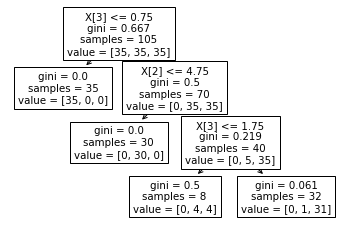

In [ ]:
tree.plot_tree(dtc.fit(X_train,y_train))

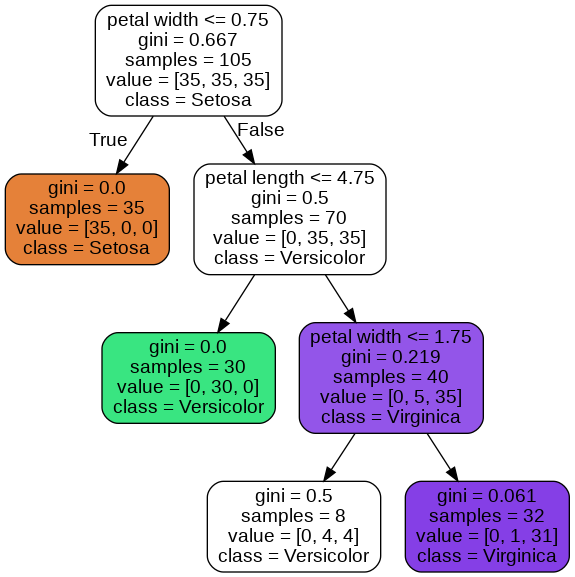

In [ ]:
# Graphic
!pip install pydotplus
from pydotplus import graph_from_dot_data  
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'], 
                           feature_names=['sepal length', 'sepal width',
                                          'petal length', 'petal width'],
                           out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')  # 현재경로(import os 엔터 os.getcwd()로 확인)에 저 장
from IPython.display import Image 
Image(graph.create_png())   # Console 창에 결과 그림 출력

In [ ]:
dtc.get_n_leaves() # 잎 수

4

In [ ]:
dtc.get_depth() # 최대 깊이

3

In [ ]:
dtc.decision_path(X_train) # 트리에서 결정경로 반환

# 샘플이 노드를 통과함을 나타내는 sparse 행렬 반환

<105x7 sparse matrix of type '<class 'numpy.int64'>'
	with 320 stored elements in Compressed Sparse Row format>

In [ ]:
dtc.cost_complexity_pruning_path(X_train, y_train) # 최소 비용-복잡성 정리 중 정리 경로

{'ccp_alphas': array([0.        , 0.02678571, 0.25      , 0.33333333]),
 'impurities': array([0.05654762, 0.08333333, 0.33333333, 0.66666667])}

In [ ]:
dtc.apply(X_train)

array([1, 1, 6, 6, 1, 6, 6, 1, 5, 3, 3, 3, 1, 3, 3, 6, 1, 3, 3, 1, 6, 6,
       3, 3, 3, 6, 3, 5, 6, 6, 3, 1, 6, 6, 6, 6, 3, 6, 6, 1, 6, 1, 5, 1,
       1, 5, 1, 1, 6, 3, 1, 3, 3, 1, 1, 1, 3, 6, 1, 5, 1, 3, 6, 1, 1, 3,
       6, 3, 3, 6, 6, 3, 3, 6, 6, 3, 1, 1, 6, 5, 6, 5, 1, 3, 6, 6, 1, 1,
       6, 1, 6, 3, 3, 3, 1, 6, 3, 1, 1, 5, 1, 3, 1, 1, 1])

In [ ]:
dtc.feature_importances_

array([0.       , 0.       , 0.4097561, 0.5902439])

In [ ]:
# !apt-get -qq install -y graphviz && pip install -q pydot
# import pydot
# !apt-get install graphviz libgraphviz-dev pkg-config
# !pip install pygraphviz
# import pygraphviz

# dot_data = tree.export_graphviz(dtc, out_file=None, 
#                       feature_names=['sepal length', 'sepal width',
#                                           'petal length', 'petal width'],  
#                       class_names=['Setosa', 'Versicolor', 'Virginica'],  
#                     filled=True, rounded=True,  
#                    special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph 

1.0
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


[Text(100.44000000000001, 201.90857142857143, 'X[3] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(66.96000000000001, 170.84571428571428, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(133.92000000000002, 170.84571428571428, 'X[2] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(100.44000000000001, 139.78285714285715, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(167.40000000000003, 139.78285714285715, 'X[3] <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(33.480000000000004, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(100.44000000000001, 77.65714285714284, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(66.96000000000001, 46.59428571428572, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 46.59428571428572, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalu

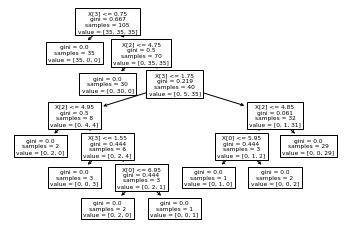

In [ ]:
# Classification Tree
import time
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=1)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  
y_test_pred = dtc.predict(X_test)    

print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))

tree.plot_tree(dtc.fit(X_train,y_train))

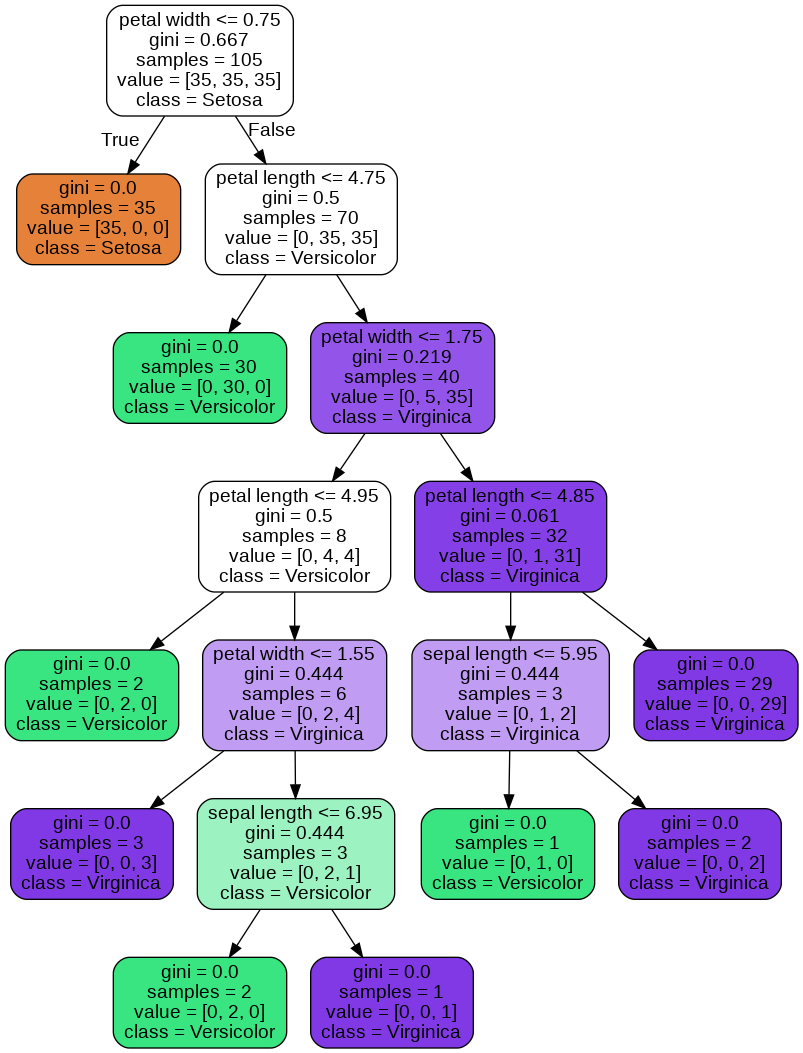

In [ ]:
dot_data = export_graphviz(dtc, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'], 
                           feature_names=['sepal length', 'sepal width',
                                          'petal length', 'petal width'],
                           out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')  # 현재경로(import os 엔터 os.getcwd()로 확인)에 저 장
from IPython.display import Image 
Image(graph.create_png())   # Console 창에 결과 그림 출력

# 2. Entropy

In [ ]:
# Classification Tree
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  
y_test_pred = dtc.predict(X_test)    

print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))

# tree.plot_tree(dtc.fit(X_train,y_train))

0.9523809523809523
0.9555555555555556
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


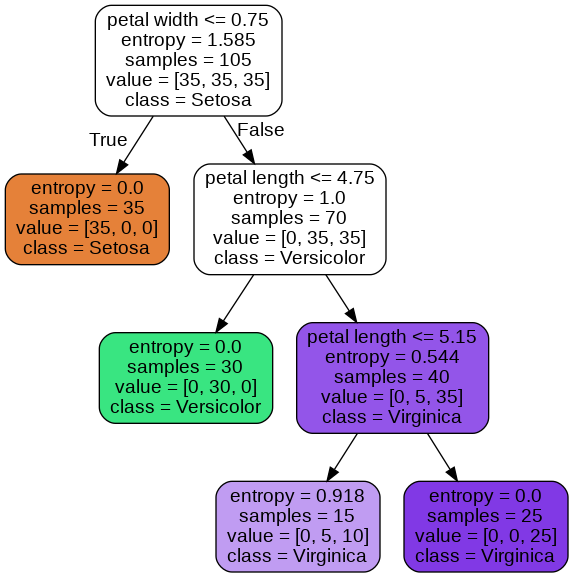

In [ ]:
dot_data = export_graphviz(dtc, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'], 
                           feature_names=['sepal length', 'sepal width',
                                          'petal length', 'petal width'],
                           out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')  # 현재경로(import os 엔터 os.getcwd()로 확인)에 저 장
from IPython.display import Image 
Image(graph.create_png())   # Console 창에 결과 그림 출력

In [ ]:
# Classification Tree
import time
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  
y_test_pred = dtc.predict(X_test)    

print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))

# tree.plot_tree(dtc.fit(X_train,y_train))

1.0
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


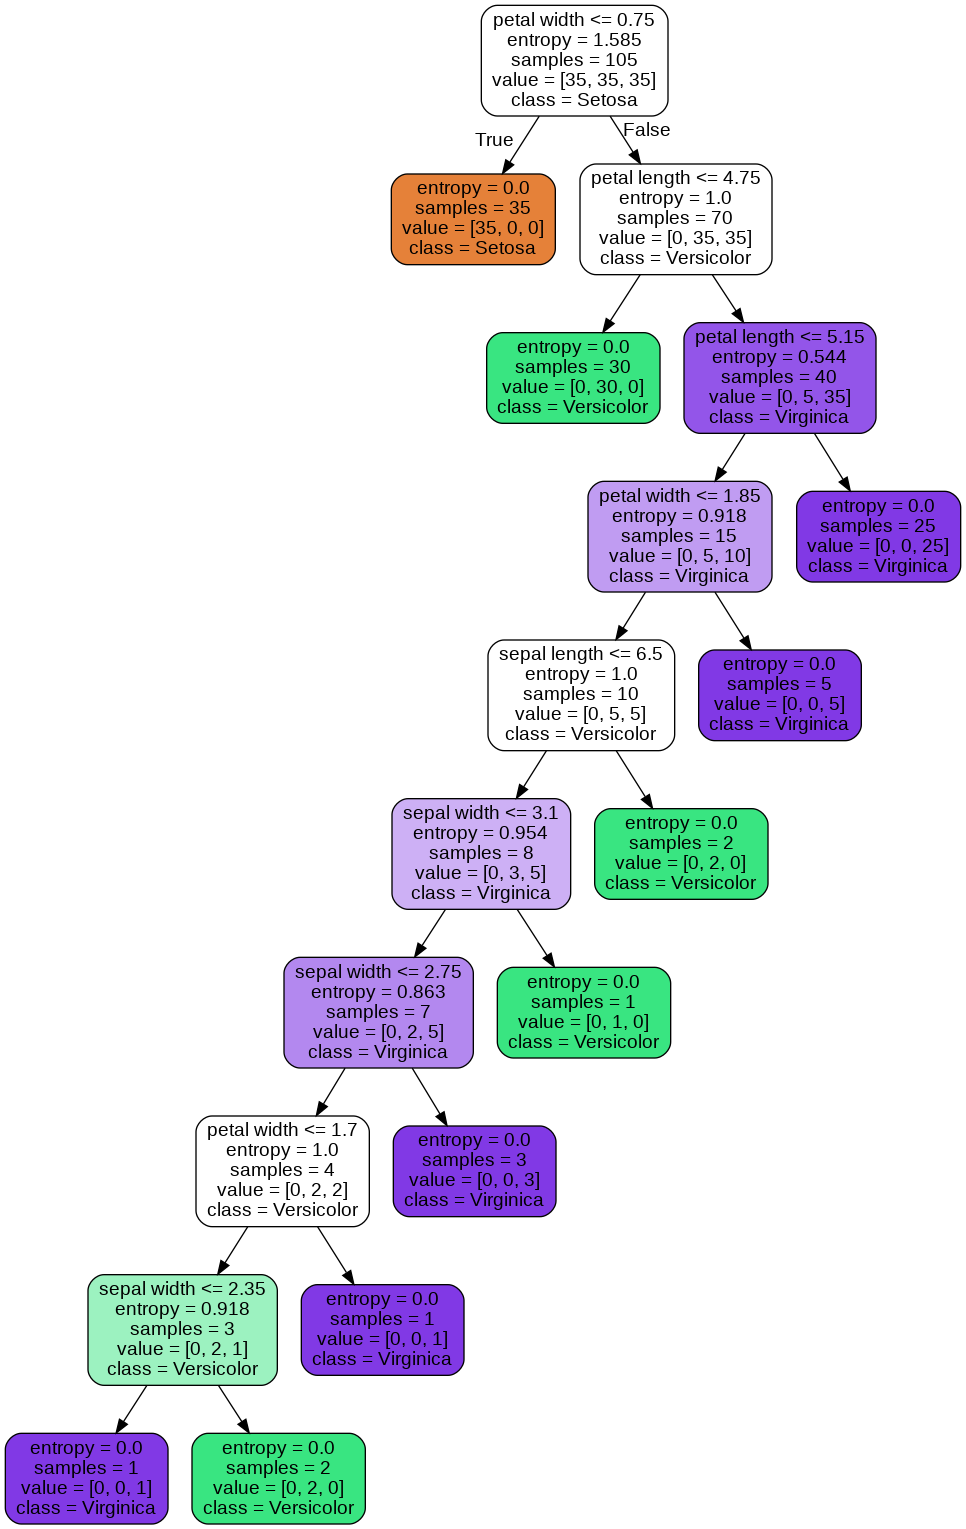

In [ ]:
dot_data = export_graphviz(dtc, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'], 
                           feature_names=['sepal length', 'sepal width',
                                          'petal length', 'petal width'],
                           out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')  # 현재경로(import os 엔터 os.getcwd()로 확인)에 저 장
from IPython.display import Image 
Image(graph.create_png())   # Console 창에 결과 그림 출력

# Visualization


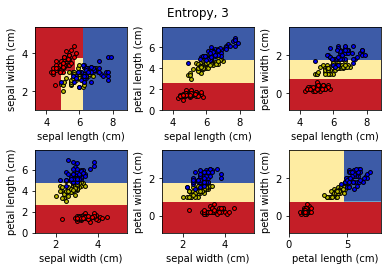

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)
    # Train
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1).fit(X_train, y_train)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Entropy, 3")
# plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

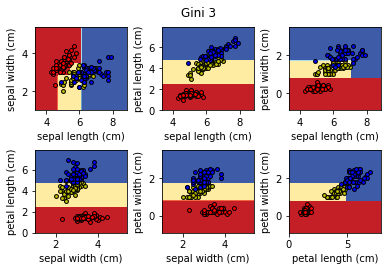

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Gini 3")
# plt.legend(loc='best', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

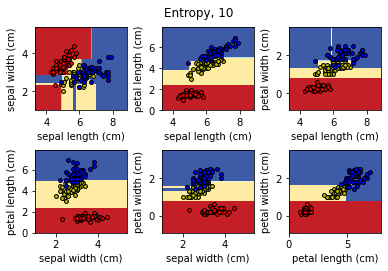

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Entropy, 10")
# plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

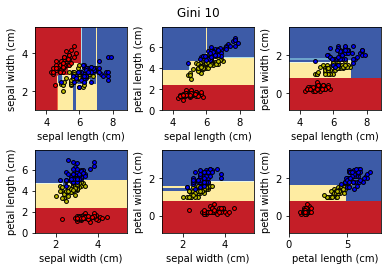

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=1).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Gini 10")
# plt.legend(loc='best', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()